In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [116]:
file_path = '/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv'
df = pd.read_csv(file_path)
df.shape

(145460, 23)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [118]:
df.isna().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [119]:
threshold1=len(df)*0.05
threshold2=len(df)*0.4
cols_to_clean=df.columns[df.isna().sum()<=threshold1]
cols_to_drop=df.columns[df.isna().sum()>=threshold2]
df.dropna(subset=cols_to_clean,inplace=True)
df.drop(cols_to_drop,axis=1,inplace=True)
df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir       6014
WindGustSpeed     6001
WindDir9am        7557
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      11215
Pressure3pm      11151
Cloud9am         50169
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [120]:
num_cols=df.select_dtypes(include=np.number).columns
df[num_cols]=df[num_cols].fillna(df[num_cols].median())
categorical_cols=df.select_dtypes(include="object").columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

([<matplotlib.patches.Wedge at 0x795457885810>,
 [Text(-0.49938947630209496, 0.9801072140121811, 'float64'),
  Text(0.49938938453783227, -0.9801072607683943, 'object')],
 [Text(-0.2723942598011427, 0.5346039349157351, '65.0%'),
  Text(0.27239420974790846, -0.5346039604191241, '35.0%')])

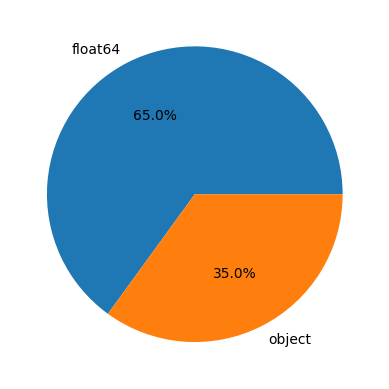

In [121]:
plt.pie(df.dtypes.value_counts(),labels=df.dtypes.value_counts().index,autopct="%1.1f%%")

In [122]:
df.select_dtypes(include="object")

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,E,ESE,E,No,No
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No


In [123]:
target_dict={"Yes": 1, "No": 0}
df["RainTomorrow"] = df["RainTomorrow"].map(target_dict)
df["RainToday"] = df["RainToday"].map(target_dict)

In [124]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,9.4,20.9,0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,12.5,26.1,0,0


In [125]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df.drop("Date", axis=1,inplace=True)

In [126]:
df = pd.get_dummies(df, columns=["Location", "WindGustDir", "WindDir9am", "WindDir3pm"], drop_first=True)
X=df.drop('RainTomorrow',axis=1)
y=df["RainTomorrow"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)[:, 1] 
y_pred = (y_probs > 0.3).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18315  2692]
 [ 1709  4202]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     21007
           1       0.61      0.71      0.66      5911

    accuracy                           0.84     26918
   macro avg       0.76      0.79      0.77     26918
weighted avg       0.85      0.84      0.84     26918



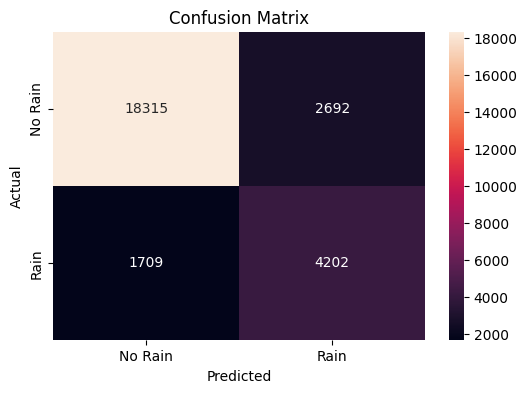

In [130]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Prediction")
plt.ylabel("Reality")
plt.title("Confusion Matrix")
plt.show()